# Pandas：

### Series
- 属性：
  - index对象
  - name
  - values

#### 关于name属性

In [33]:
import pandas as pd
s =pd.Series([1,2,3,4,5])
print(s.name)
print(s.reset_index())
s1 = pd.Series([1,2,3,4,5],name="s1")
print(s1.name)
print(s1.reset_index())


None
   index  0
0      0  1
1      1  2
2      2  3
3      3  4
4      4  5
s1
   index  s1
0      0   1
1      1   2
2      2   3
3      3   4
4      4   5


### 数据框属性/方法

#### loc方法

In [2]:
import pandas as pd

data = {
    "calories": [420, 380, 390],
    "duration": [50, 40, 45]
    }

df = pd.DataFrame(data, index = ["day1", "day2", "day3"])
print("用行索引数据框")
print(df[1:3])
# print(df.loc[1:2, ['Name', 'Age']])
print("修改某列的值：")
df['calories'] = [100, 200, 300]
print(df)
print("用loc同时索引行和列：")
print(df.loc["day1","duration"])

      calories  duration
day2       380        40
day3       390        45
修改某列的值
      calories  duration
day1       100        50
day2       200        40
day3       300        45
用loc同时索引行和列
50


#### 筛选之后返回的数据框的index是原来的index

In [3]:
import pandas as pd 
df = pd.DataFrame({'A':[0,1,2],'B':[3,4,5]})
print(df[df["A"]>1])
print(df[df['A']>1].reset_index())

   A  B
2  2  5
   index  A  B
0      2  2  5


### 增加数据框行列数据

In [17]:
# 为数据框增加多行/列数据：
# 1. 使用join方法增加多列数据时，默认how='left'
# 解决方法1：为新DataFrame设置相同的索引
new_cols = {
'col1': [1, 2, 3],
'col2': [4, 5, 6]
}
# df = df.join(pd.DataFrame(new_cols, index=["day1", "day2", "day3"]))
df = df.join(pd.DataFrame(new_cols, index=["day1", "day2", "day4"]))


# 解决方法2：直接赋值（更简单）
# df['col1'] = [1, 2, 3]
# df['col2'] = [4, 5, 6]

df = df.assign(col3=[7, 8, 9], col4=[10, 11, 12])
print(df)

In [7]:
#读取csv/写入csv
import pandas as pd
df = pd.read_csv('./pandas_learning_data/nba.csv',header=0,index_col=0)
print(df)
df.to_csv('./pandas_learning_data/nba_new.csv')


                         Team  Number Position   Age Height  Weight  \
Name                                                                  
Avery Bradley  Boston Celtics     0.0       PG  25.0    6-2   180.0   
Jae Crowder    Boston Celtics    99.0       SF  25.0    6-6   235.0   
John Holland   Boston Celtics    30.0       SG  27.0    6-5   205.0   
R.J. Hunter    Boston Celtics    28.0       SG  22.0    6-5   185.0   
Jonas Jerebko  Boston Celtics     8.0       PF  29.0   6-10   231.0   
...                       ...     ...      ...   ...    ...     ...   
Shelvin Mack        Utah Jazz     8.0       PG  26.0    6-3   203.0   
Raul Neto           Utah Jazz    25.0       PG  24.0    6-1   179.0   
Tibor Pleiss        Utah Jazz    21.0        C  26.0    7-3   256.0   
Jeff Withey         Utah Jazz    24.0        C  26.0    7-0   231.0   
NaN                       NaN     NaN      NaN   NaN    NaN     NaN   

                         College     Salary  
Name                          

### 数据清洗

In [1]:
# 删除空值： #DataFrame.dropna(axis=0, how="any", subset=None, inplace=False)
import pandas as pd
df = pd.read_csv('./pandas_learning_data/property-data.csv', header=0)
# 判断"NUM_BEDROOMS"列中是否存在空值
print(df["NUM_BEDROOMS"].isnull())
# 指定空值并寻找”NUM_BEDROOMS“列中空值的行
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("./pandas_learning_data/property-data.csv", na_values=missing_values)
print(df["NUM_BEDROOMS"])
print(df["NUM_BEDROOMS"].isnull())
# 删除包含空值的行
df.dropna()
# 删除指定列中包含空值的行
df.dropna(subset=["NUM_BEDROOMS"])
# 修改源数据
df.dropna(inplace=True)


#用均值/中位数/众数填充空值
df=pd.read_csv("./pandas_learning_data/property-data.csv", na_values=missing_values)
x=df["NUM_BEDROOMS"].mean()
df["NUM_BEDROOMS"].fillna(x,inplace=True)
print(df)

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool
0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    1.0
8    NaN
Name: NUM_BEDROOMS, dtype: float64
0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
Name: NUM_BEDROOMS, dtype: bool
           PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y      3.000000        1  1000.0
1  100002000.0   197.0   LEXINGTON            N      3.000000      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N      2.166667        1   850.0
3  100004000.0   201.0    BERKELEY           12      1.000000      NaN   700.0
4          NaN   203.0    BERKELEY            Y      3.000000        2  1600.0
5  100006000.0   207.0    BERKELEY            Y      2.166667        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN      2.000000   HURLE

C:\Users\99238\AppData\Local\Temp\ipykernel_24864\138594654.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["NUM_BEDROOMS"].fillna(x,inplace=True)


In [12]:
#要避免链式赋值
df["NUM_BEDROOMS"][df["NUM_BEDROOMS"] > 2] = 5
print(df)


           PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           5.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           5.0      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N           5.0        1   850.0
3  100004000.0   201.0    BERKELEY           12           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           5.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           5.0        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           1.0        1     NaN
8  100009000.0   215.0     TREMONT            Y           5.0        2  1800.0


C:\Users\99238\AppData\Local\Temp\ipykernel_33104\3109753141.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["NUM_BEDROOMS"][df["NUM_BEDROOMS"] > 2] = 5
C:\Users\99238\AppData\Local\Temp\ipykernel_33104\3109753141.py:1: SettingWithCop

### 分组聚合与排序(对分组后数据应用函数)
- 分组后排序使用.sort_values()更方便；
- 分组后聚合（本质上是对各组使用函数）：
  - 操作只涉及单列且聚合值不用返回到原数据中，使用.agg()函数；
  - 操作涉及多列，可以在.agg()中通过函数从外部引入其它列，但apply也可以；
  - 当要返回聚合值到原数据中，使用.transform()函数；
- 应用函数前有两种模式：
  - 只有groupby
  - groupby之后还选择了列
- 可以通过迭代的方式操作groupby对象

#### 对groupby对象使用.agg()函数,适合于只操作一列数据
- .agg(func)中func函数接受一个Series对象，返回一个标量值，返回值的类型可以是数值类型、字符串类型、布尔类型、日期时间类型等。
- 是否要指定列名：
  - 如果只有groupby,则.agg()括号中需要指定列名和函数；
  - 如果groupby之后还选择了列，则.agg()可以指定列名和函数，也可以不指定列名，直接使用函数；
  - 如果groupby之后选择了多列，则.agg()里的函数分分别作用在两列上
- DataFrame.groupby().agg() 操作后返回的数据框的 index 通常是 groupby 时使用的列值;当以多列为groupby依据时返回的index是多重索引

In [3]:
#分组聚合
import pandas as pd
data={
    'Department': ['HR', 'Finance', 'HR', 'IT', 'IT'],
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Salary': [50000, 60000, 55000, 70000, 75000]
}
df=pd.DataFrame(data)
df.groupby("Department").agg({"Salary":"mean"})

# 多重聚合
print(df.groupby("Department").agg({"Salary":["mean","sum"]}))

# 选择多列 - 使用列表而不是元组
print(df.groupby("Department")[["Employee","Salary"]].agg(lambda x: x.isnull().any()))


             Salary        
               mean     sum
Department                 
Finance     60000.0   60000
HR          52500.0  105000
IT          72500.0  145000
            Employee  Salary
Department                  
Finance        False   False
HR             False   False
IT             False   False


分组依据是多列情况

In [ ]:
import pandas as pd

# 创建一个示例 DataFrame（模拟推荐数据）
data = {
    'user_id': [1, 1, 2, 2, 1, 3],
    'item_id': ['A', 'A', 'B', 'B', 'C', 'A'],
    'click': [1, 0, 1, 1, 0, 1],
    'rating': [4.5, 3.0, 5.0, 4.0, 2.5, 4.0]
}
df = pd.DataFrame(data)

# 对多列进行 groupby：按 'user_id' 和 'item_id' 分组，聚合多个字段
grouped = df.groupby(['user_id', 'item_id']).agg({
    'click': 'sum',      # 求 click 的总和（处理可能的多记录）
    'rating': 'mean'     # 求 rating 的平均值（平滑冲突评分）
})
print(grouped)
grouped=grouped.reset_index()

# 输出结果
print(grouped)


                 click  rating
user_id item_id               
1       A            1    3.75
        C            0    2.50
2       B            2    4.50
3       A            1    4.00
                 click  rating
user_id item_id               
1       A            1    3.75
        C            0    2.50
2       B            2    4.50
3       A            1    4.00


#### 对groupby对象使用apply函数 (涉及多列时可以使用apply函数)
- 适用于**返回各个组的统计量**，如果要把各个组的统计量应用到各组成员上，适合适用transform函数；
- 对整个groupby对象和grouby后选择列使用.apply的不同：
  - DataFrame.groupby().apply(func) 中func的参数是整个分组（报deprecated warning:分组子dataframe的group column以后不会包含在子dataframe中）；
  - DataFrame.groupby()["column1"].apply(func)中func的参数是Series;
- 在Series情况下，func的返回值不同最终形成的结构也不同：
  - 如果返回的是1维的（标量，列表），.apply()最终会返回一个Series,索引是分组索引，值是返回的标量；
  - 如果返回的是Series，会形成多级索引；
  - 传入的函数返回一个 DataFrame（哪怕只是对一列），则 .apply() 会拼接这些 DataFrame，也会产生多级索引：
- 在DataFrame情况下，func的返回值不同最终形成的结构也不同：
  - 如果返回的是1维的（标量，列表），.apply()最终会返回一个DataFrame,索引是分组索引，值是返回的标量；


In [4]:
# 对series进行apply
import pandas as pd

df = pd.DataFrame({
    'department': ['HR', 'HR', 'IT', 'IT', 'Sales'],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'salary': [5000, 6000, 7000, 8000, 5500]
})

### apply中函数返回标量的情况：
df1 = df.groupby("department")["salary"].apply(lambda x: x.mean())
print(f"apply返回标量的情况：\n{df1}")

### apply中函数返回Series的情况：
df2 = df.groupby("department")["salary"].apply(lambda x: pd.Series([x.mean(), x.max()], index=['mean', 'max']))
print(f"\napply返回Series的情况：\n{df2}")
df3 = df.groupby("department")["salary"].apply(lambda x: x*2)
print(f"\napply返回Series的情况：\n{df3}")

### apply中函数返回DataFrame的情况：
def custom_summary(group):
    double = group*2
    triple = group*3
    return pd.DataFrame({
        'double': double.values,
        'triple': triple.values
    })
df4 = df.groupby("department")["salary"].apply(custom_summary)
print(f"\napply返回DataFrame的情况：\n{df4}")

df5 = df.groupby("department")["salary"].apply(lambda x: pd.Series({'mean': x.mean(), 'max': x.max()}))
print(f"\napply返回DataFrame的情况：\n{df5}")


apply返回标量的情况：
department
HR       5500.0
IT       7500.0
Sales    5500.0
Name: salary, dtype: float64

apply返回Series的情况：
department      
HR          mean    5500.0
            max     6000.0
IT          mean    7500.0
            max     8000.0
Sales       mean    5500.0
            max     5500.0
Name: salary, dtype: float64

apply返回Series的情况：
department   
HR          0    10000
            1    12000
IT          2    14000
            3    16000
Sales       4    11000
Name: salary, dtype: int64

apply返回DataFrame的情况：
              double  triple
department                  
HR         0   10000   15000
           1   12000   18000
IT         0   14000   21000
           1   16000   24000
Sales      0   11000   16500

apply返回DataFrame的情况：
department      
HR          mean    5500.0
            max     6000.0
IT          mean    7500.0
            max     8000.0
Sales       mean    5500.0
            max     5500.0
Name: salary, dtype: float64


In [ ]:
# 对dataframe使用apply
import pandas as pd

df = pd.DataFrame({
    'department': ['HR', 'HR', 'IT', 'IT', 'Sales'],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'salary': [5000, 6000, 7000, 8000, 5500]
})

### apply中函数返回标量的情况：
df1 = df.groupby("department").apply(lambda x: x["salary"].mean())
print(df1)

department
HR       5500.0
IT       7500.0
Sales    5500.0
dtype: float64


C:\Users\99238\AppData\Local\Temp\ipykernel_24320\3205002708.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df1 = df.groupby("department").apply(lambda x: x["salary"].mean())


##### 计算每个组的统计特征
注意如果使用.mean()那返回的是Series

In [25]:
import pandas as pd

df = pd.DataFrame({
    'department': ['HR', 'HR', 'IT', 'IT', 'Sales'],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'salary': [5000, 6000, 7000, 8000, 5500]
})

def custom_summary(group):
    return pd.Series({
        'min_salary': group['salary'].min(),
        'max_salary': group['salary'].max(),
        'avg_salary': group['salary'].mean()
    })

result = df.groupby('department').apply(custom_summary)
print(result)

result2 = df.groupby("department")["salary"].mean()
print(result2)
print(result2.name)
print(result2.reset_index())


            min_salary  max_salary  avg_salary
department                                    
HR              5000.0      6000.0      5500.0
IT              7000.0      8000.0      7500.0
Sales           5500.0      5500.0      5500.0
department
HR       5500.0
IT       7500.0
Sales    5500.0
Name: salary, dtype: float64
salary
  department  salary
0         HR  5500.0
1         IT  7500.0
2      Sales  5500.0


C:\Users\99238\AppData\Local\Temp\ipykernel_24320\3052537639.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('department').apply(custom_summary)


##### 增加某些行
这个操作本质上应该用.transform,用apply会产生多重行索引

In [35]:
import pandas as pd

df = pd.DataFrame({
    'department': ['HR', 'HR', 'IT', 'IT', 'Sales'],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'salary': [5000, 6000, 7000, 8000, 5500]
})

def add_mean_salary(group):
    group['mean_salary'] = group['salary'].mean()
    return group

result2 = df.groupby('department').apply(add_mean_salary)
print(result2)
print(result2.reset_index())

             department     name  salary  mean_salary
department                                           
HR         0         HR    Alice    5000       5500.0
           1         HR      Bob    6000       5500.0
IT         2         IT  Charlie    7000       7500.0
           3         IT    David    8000       7500.0
Sales      4      Sales      Eve    5500       5500.0


C:\Users\99238\AppData\Local\Temp\ipykernel_24320\518952235.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result2 = df.groupby('department').apply(add_mean_salary)


ValueError: cannot insert department, already exists

##### 筛选某些行
筛选工资高于组内平均的行

In [16]:
import pandas as pd

df = pd.DataFrame({
    'department': ['HR', 'HR', 'IT', 'IT', 'Sales'],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'salary': [5000, 6000, 7000, 8000, 5500]
})

def filter_high_salary(group):
    return group[group['salary'] >= group['salary'].mean()]

df.groupby('department').apply(filter_high_salary)

C:\Users\99238\AppData\Local\Temp\ipykernel_24320\4261440503.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('department').apply(filter_high_salary)


,,department,name,salary
department,,,,
HR,1,HR,Bob,6000
IT,3,IT,David,8000
Sales,4,Sales,Eve,5500


In [18]:
import pandas as pd

# 创建一个示例 DataFrame
data = {'user_id': ['u1', 'u2', 'u1', 'u3', 'u2', 'u4', 'u1', 'u3'],
        'item_id': ['i1', 'i1', 'i2', 'i2', 'i2', 'i3', 'i3', 'i3']}
df = pd.DataFrame(data)

# 核心转换代码
item_user_dict = df.groupby('item_id')['user_id'].apply(list)

# 打印结果
print(item_user_dict)


item_id
i1        [u1, u2]
i2    [u1, u3, u2]
i3    [u4, u1, u3]
Name: user_id, dtype: object


##### 从用户交互过的物品中随机采样一部分（apply用在整个分组子数据框上，但涉及分组column如何处理的问题）

In [14]:
import pandas as pd
import numpy as np

# 生成样例数据：2个用户，每个有25个交互
np.random.seed(42)  # 设置种子确保可复现
user_ids = [1] * 25 + [2] * 25
item_ids = np.random.randint(100, 200, size=50)  # 随机item_id
clicks = np.random.randint(0, 2, size=50)  # 随机click (0或1)
df = pd.DataFrame({
    'user_id': user_ids,
    'item_id': item_ids,
    'click': clicks
})
train_df = df.groupby('user_id').apply(lambda group: group.sample(n=20),include_groups=False)
print(train_df)
print(train_df.reset_index())

            item_id  click
user_id                   
1       1       192      1
        10      187      1
        4       160      1
        9       174      0
        5       120      1
        2       114      0
        3       171      1
        13      102      0
        23      120      1
        11      199      1
        6       182      1
        16      101      1
        0       151      1
        21      163      1
        18      129      1
        19      137      0
        8       174      1
        22      159      0
        14      121      1
        17      187      0
2       40      161      1
        28      188      1
        35      179      0
        43      163      1
        39      146      1
        37      161      1
        47      120      1
        30      190      1
        41      150      1
        27      121      1
        48      172      1
        42      154      1
        38      161      1
        44      102      0
        49      138      0
 

#### 对groupby对象适用.transform函数
- 用于执行特定类型的组内计算，并将结果广播（broadcast）回原始数据的形状。不会形成多重行索引

In [53]:
import pandas as pd

df = pd.DataFrame({
    'department': ['HR', 'HR', 'IT', 'IT', 'Sales'],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'salary': [5000, 6000, 7000, 8000, 5500]
})


df['mean_salary'] = df.groupby('department')['salary'].transform('mean')
print(df)

  department     name  salary  mean_salary
0         HR    Alice    5000       5500.0
1         HR      Bob    6000       5500.0
2         IT  Charlie    7000       7500.0
3         IT    David    8000       7500.0
4      Sales      Eve    5500       5500.0


### 数据框拼接

#### pd.concat([], axis=0, ignore_index)
 如果不适用ignore_index index在拼接后会重复

In [ ]:
# 如果不适用ignore_index index在拼接后会重复
import pandas as pd
DataFrame1 = pd.DataFrame({"A":[1,3,4],"B":[2,3,4]})
DataFrame2 = pd.DataFrame({"A":[7,8,9],"B":[10,11,12]})
print(pd.concat([DataFrame1, DataFrame2], axis=0))
print(pd.concat([DataFrame1,DataFrame2],axis=0,ignore_index=True)) 


   A   B
0  1   2
1  3   3
2  4   4
0  7  10
1  8  11
2  9  12
   A   B
0  1   2
1  3   3
2  4   4
3  7  10
4  8  11
5  9  12


In [11]:
# 数据框的拼接：
import pandas as pd
# 1. 数据库方式的拼接
left = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
right = pd.DataFrame({'ID': [1, 2, 4], 'Age': [24, 27, 22]})


result = pd.merge(left, right, on='ID', how='inner')
print(result)

# 2. 沿轴连接
print("沿轴拼接结果：")
print("axis=0的结果")
print(pd.concat([left,right],axis=0))
print("axis为1的结果")
print(pd.concat([left,right],axis=1))
#重新设置索引
print(pd.concat([left,right],axis=0).reset_index()) #索引会变成新列

print(pd.concat([left,right],axis=0).reset_index(drop=True))

# 3. 索引方式的拼接
print("join的结果")
result = left.join(right.rename(columns={'ID': 'ID_right'}), how='inner') #不能有两个列同名，所以重命名了。
result1 = left.join(right.rename(columns={'ID': 'ID_right'}), how='inner', on='ID') #左侧是id右侧是索引；
# result2 = left.join(right, how='inner') #报错
print(f"result的结果：\n {result}")
print(f"result1的结果：\n {result1}")


#关于是否能有列名重复的df的问题：
conflict_columns_df = pd.concat([left,right],axis=1)
print(conflict_columns_df["ID"])
df = pd.DataFrame({
    'ID': [1, 2, 3],
    'ID': [10, 20, 30],     # 重复列名
    'Age': [24, 27, 22]
})
print(df)
df["ID"]

   ID   Name  Age
0   1  Alice   24
1   2    Bob   27
沿轴拼接结果：
axis=0的结果
   ID     Name   Age
0   1    Alice   NaN
1   2      Bob   NaN
2   3  Charlie   NaN
0   1      NaN  24.0
1   2      NaN  27.0
2   4      NaN  22.0
axis为1的结果
   ID     Name  ID  Age
0   1    Alice   1   24
1   2      Bob   2   27
2   3  Charlie   4   22
   index  ID     Name   Age
0      0   1    Alice   NaN
1      1   2      Bob   NaN
2      2   3  Charlie   NaN
3      0   1      NaN  24.0
4      1   2      NaN  27.0
5      2   4      NaN  22.0
   ID     Name   Age
0   1    Alice   NaN
1   2      Bob   NaN
2   3  Charlie   NaN
3   1      NaN  24.0
4   2      NaN  27.0
5   4      NaN  22.0
join的结果
result的结果：
    ID     Name  ID_right  Age
0   1    Alice         1   24
1   2      Bob         2   27
2   3  Charlie         4   22
result1的结果：
    ID   Name  ID_right  Age
0   1  Alice         2   27
1   2    Bob         4   22
   ID  ID
0   1   1
1   2   2
2   3   4
   ID  Age
0  10   24
1  20   27
2  30   22


0    10
1    20
2    30
Name: ID, dtype: int64

### 自定义函数的应用

#### DataFrame.apply(function, axis=0)函数
apply函数用在DataFrame上就是对Series用，用在Series上就是对元素用。

In [22]:
#自定义函数的应用
import pandas as pd 
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

def custom_function(x):
    return x ** 2

df1 = df.apply(custom_function)
print(df,df1)
df.applymap(custom_function)


   A  B
0  1  4
1  2  5
2  3  6    A   B
0  1  16
1  4  25
2  9  36


C:\Users\99238\AppData\Local\Temp\ipykernel_21576\3994728373.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(custom_function)


,A,B
0,1,16
1,4,25
2,9,36


In [12]:
import pandas as pd 
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df.apply(lambda x: x.max()-x.min()).loc["A"]

2

#### Series.map(function)  或 DataFrame.map(function)
- 可以接受一个函数，也可以接受一个字典
- 可以接受一个字典
- 可以接受一个Series:将第一个Series的值做为第二个Series的索引，然后返回第二个Series的值

In [11]:
import pandas as pd

s1 = pd.Series(['a', 'b', 'c', 'd'], index=['w', 'x', 'y', 'z'])
s2 = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
result = s1.map(s2)
print(result)


w    10.0
x    20.0
y    30.0
z     NaN
dtype: float64


In [ ]:
import pandas as pd 
dataframe = pd.DataFrame({"A":[1,2,3],"B":[4,5,6]})
dataframe.map(lambda x: x*10)

,A,B
0,10,40
1,20,50
2,30,60


### 多重索引

In [3]:
import pandas as pd

# 创建元组
index_tuples = [('A', 1), ('A', 2), ('B', 1), ('B', 2)]

# 创建多重索引
multi_index = pd.MultiIndex.from_tuples(index_tuples, names=['Letter', 'Number'])

# 创建 DataFrame
df = pd.DataFrame({'Value': [10, 20, 30, 40]}, index=multi_index)
print(df)

               Value
Letter Number       
A      1          10
       2          20
B      1          30
       2          40


In [34]:
import pandas as pd

# 示例数据
data = {
    'Letter': ['A', 'A', 'B', 'B'],
    'Number': [1, 2, 1, 2],
    'Value': [10, 20, 30, 40]
}

df = pd.DataFrame(data)

# 设置多重索引
df.set_index(['Letter', 'Number'], inplace=True)

# 选择 'A' 类别，所有 'Number' 为 1 的数据
print(df.loc['A', 1])

Value    10
Name: (A, 1), dtype: int64


### 存储数据框的文件格式
- excel
- csv
- feather

### 基础应用:
知道基础知识后最重要的点就是：
- unique
- 计数
- 排序与筛选（sort, select)
- 采样
- 向量操作（对行列的整体操作）
- 自定义函数的应用
- 与其它数据类型转化

####  Unique
- Series.unique()和Series.nunique()的用法
    - pandas的unique()不支持return_counts等参数；

##### Series.unique()和Series.nunique()的用法

In [ ]:
# Series.unique()和Series.nunique()的用法
import pandas as pd
import numpy as np

# 创建示例数据框
df = pd.DataFrame({
    'A': [1, 2, 2, 3, 1],
    'B': ['a', 'b', 'b', 'c', 'a']
})

# 使用unique()方法获取唯一值
unique_values = df['A'].unique()
print(type(unique_values))
print(unique_values) #注意numpy数组输出时各元素之间没有逗号

# 使用nunique()方法获取唯一值的计数
unique_counts = df['A'].nunique()
print(unique_counts)

<class 'numpy.ndarray'>
[1 2 3]
3


#### Series.value_counts()的用法: 统计Series中每个值出现的次数
Series.value_counts(
    normalize=False,
    sort=True,
    ascending=False,
    bins=None,
    dropna=True
)
返回的是Series，索引是值，值是出现的次数

In [1]:
import pandas as pd

s = pd.Series(['apple', 'banana', 'apple', 'orange', 'banana', 'apple'])

counts = s.value_counts()
print(counts)
print(counts.reset_index().rename(columns={'index':'value','value':'count'}))


apple     3
banana    2
orange    1
Name: count, dtype: int64
    value  count
0   apple      3
1  banana      2
2  orange      1


#### DataFrame.sort_values(by,ascending=True)与sorted(iterable,key=None, reverse=False)的用法
- ascending=True 表示升序, reverse=False 表示升序

#### DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)  
- n：要抽取的样本数量（整数）。
- frac：要抽取的比例（0~1 之间的小数），和 n 不能同时指定。
- replace：是否放回抽样，默认为 False（不放回）。
- weights：权重，可以是列名或列表，用于按概率抽样。
- random_state：随机种子，设置后可复现结果。
- axis：默认是 axis=0（按行抽样），设为 1 可按列抽样。

#### df.iterrows()的用法：返回一个迭代器，每次迭代返回行的索引和行的数据，用来将DataFrame的每一行转成series,series的index是每列的列名

In [ ]:
import pandas as pd

# 创建一个示例DataFrame
data = {
    '姓名': ['张三', '李四', '王五'],
    '年龄': [25, 30, 35],
    '城市': ['北京', '上海', '广州']
}
df = pd.DataFrame(data)

print("原始DataFrame:")
print(df)
print("\n使用iterrows()遍历:")
# 使用iterrows()遍历DataFrame
for index, row in df.iterrows():
    print(f"\n索引: {index}")
    print(f"姓名: {row['姓名']}")
    print(f"年龄: {row['年龄']}")
    print(f"城市: {row['城市']}")

#### DataFrame.items()和Series.items()的用法；
- 对DataFrame用.items()返回的是列名和列的Series；
- 对Series用.items()返回的是索引和值；

In [1]:
import pandas as pd 
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
for col in df.columns:
    print(col)
for name, value in df.items():
    print(f"The name of the column is {name}")
    print(f"The type of the column is {type(value)}")
    print(f"The value of the column is \n{value}\n")
for name, value in df["A"].items():
    print(f"The name of the column is {name}")
    print(f"The type of the column is {type(value)}")
    print(f"The value of the column is \n{value}\n")


A
B
The name of the column is A
The type of the column is <class 'pandas.core.series.Series'>
The value of the column is 
0    1
1    2
2    3
Name: A, dtype: int64

The name of the column is B
The type of the column is <class 'pandas.core.series.Series'>
The value of the column is 
0    4
1    5
2    6
Name: B, dtype: int64

The name of the column is 0
The type of the column is <class 'int'>
The value of the column is 
1

The name of the column is 1
The type of the column is <class 'int'>
The value of the column is 
2

The name of the column is 2
The type of the column is <class 'int'>
The value of the column is 
3



In [ ]:
import pandas as pd
df = pd.Series([1,2,3,4,5],dtype='float64')
for value in df:
    print(type(value))
    print(value)

<class 'float'>
1.0
<class 'float'>
2.0
<class 'float'>
3.0
<class 'float'>
4.0
<class 'float'>
5.0


#### Series.isin(values)或DataFrame.isin(values)  
values：要检查的值，可以是以下类型：
- 列表：例如 [1, 2, 3]。
- Series：
- 字典：字典中的键为列名，值为要检查的列表或集合。
- DataFrame：  

返回一个布尔型的 Series 或 DataFrame，表示每个元素是否在给定的集合中。


##### value是列表情况：

In [ ]:
import pandas as pd
series = pd.Series([1, 2, 3, 4, 5])
result = series.isin([1, 4, 5])
print(result)

0     True
1    False
2    False
3     True
4     True
dtype: bool


##### value是Series是情况：

In [ ]:
import pandas as pd
query_series = pd.Series([1, 2, 3, 4, 5])
target_series = pd.Series([1, 4, 5])
result = query_series.isin(target_series)
print(result)

0     True
1    False
2    False
3     True
4     True
dtype: bool


##### value是字典情况：
可以结合any和all方法，来对多列进行判断

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8]
})

check_dict = {'A': [1, 3], 'B': [6, 8]}
result = df.isin(check_dict)
print(result)

# 取或者A在或者B在的行
print(df[result.any(axis=1)])

# 取A在且B也在的行
print(df[result.all(axis=1)])


       A      B
0   True  False
1  False   True
2   True  False
3  False   True
   A  B
0  1  5
1  2  6
2  3  7
3  4  8
Empty DataFrame
Columns: [A, B]
Index: []


##### value是DataFrame情况：
- 没有匹配的列时只能返回False

In [ ]:
import pandas as pd

# 创建两个 DataFrame
df1 = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8],
    'C': [9, 10, 11, 12]
})

df2 = pd.DataFrame({
    'A': [1, 3, 5],
    'B': [6, 7, 9]
})

result = df1.isin(df2)
print(result)

       A      B      C
0   True  False  False
1  False  False  False
2  False  False  False
3  False  False  False


#### 改变DataFrame列或Series的类型
用.astype()方法,不能直接用int(Series)

In [ ]:
import pandas as pd
import numpy as np
a = np.arange(0,1,0.1).reshape(5,2)
df =pd.DataFrame(a,columns = ["A","B"])
df["A"] = (df["A"]>0.5).astype(int)
print(df)

   A    B
0  0  0.1
1  0  0.3
2  0  0.5
3  1  0.7
4  1  0.9


In [6]:
import pandas as pd
print(pd.__version__)

2.2.2


#### groupby是迭代器
下面的例子：
1. 使用groupby对象返回某连锁店各分店销售数据
2. 返回各分店不同产品销售数据

注意for返回的已经是数据框了；

Store A, Product Gadget: Total Sales = $7450
Store A, Product Widget: Total Sales = $7150
  Peak sales date: 2023-04-06
  Average sales: $357.50
  Sales variance: 22538.16
Store B, Product Gadget: Total Sales = $7230
Store B, Product Widget: Total Sales = $7530
Store C, Product Widget: Total Sales = $7370


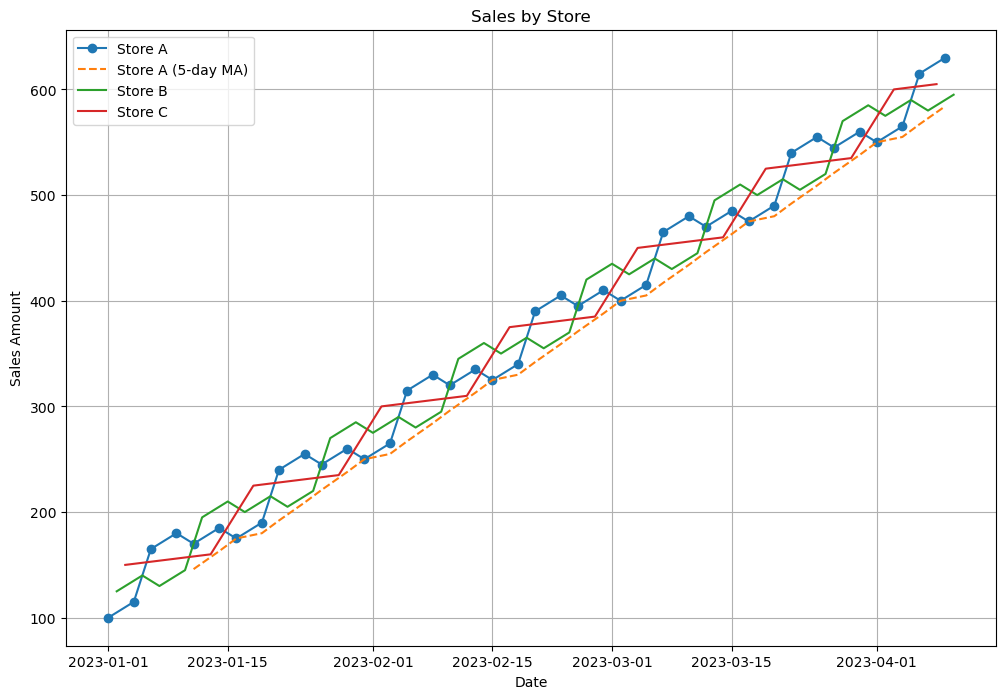

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个包含销售数据的DataFrame
sales_data = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=100),
    'store': ['A', 'B', 'C', 'A', 'B'] * 20,
    'product': ['Widget', 'Gadget', 'Widget', 'Gadget', 'Widget'] * 20,
    'sales': [100 + i * 5 + (i % 3) * 20 for i in range(100)]
})

# 按store分组
store_groups = sales_data.groupby('store')

# 迭代每个组，为每个商店创建单独的销售时间序列图
plt.figure(figsize=(12, 8))

# 使用groupby对象作为迭代器
for store_name, store_data in store_groups:
    # 处理每个商店的数据
    store_data = store_data.sort_values('date')
    
    # 为每个商店绘制销售趋势线
    plt.plot(store_data['date'], store_data['sales'], 
             label=f'Store {store_name}', 
             marker='o' if store_name == 'A' else None)
    
    # 我们可以对每个组执行独特的操作
    if store_name == 'A':
        # 为商店A添加移动平均线
        plt.plot(store_data['date'], 
                 store_data['sales'].rolling(window=5).mean(),
                 linestyle='--', 
                 label=f'Store {store_name} (5-day MA)')

plt.title('Sales by Store')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
# plt.show()  # 实际使用时取消注释

# 迭代store和product的组合分组
for (store, product), group_data in sales_data.groupby(['store', 'product']):
    # 计算每个商店-产品组合的总销售额
    total_sales = group_data['sales'].sum()
    print(f"Store {store}, Product {product}: Total Sales = ${total_sales}")
    
    # 只对特定组合执行详细分析
    if store == 'A' and product == 'Widget':
        print(f"  Peak sales date: {group_data.loc[group_data['sales'].idxmax()]['date'].strftime('%Y-%m-%d')}")
        print(f"  Average sales: ${group_data['sales'].mean():.2f}")
        print(f"  Sales variance: {group_data['sales'].var():.2f}")

#### 聚合之后再选择特定列
注意groupby之后的数据类型是DataFrameGroupBy，不能直接使用列名选择列(df.groupby('group')['value1']).

In [1]:
# 聚合之后再选择特定列
import pandas as pd

# 创建示例数据
df = pd.DataFrame({
    'group': ['A', 'A', 'B', 'B'],
    'value1': [1, 2, 3, 4],
    'value2': [10, 20, 30, 40]
})

# 对特定列进行聚合
print(df.groupby('group')['value1'].mean())
# 输出:
# group
# A    1.5
# B    3.5
# Name: value1, dtype: float64

# 对多列进行聚合
print(df.groupby('group')[['value1', 'value2']].mean())
# 输出:
#        value1  value2
# group               
# A        1.5    15.0
# B        3.5    35.0

# 只有列名
print(df.groupby('group')['value1']) #只返回了.groupby对象。

group
A    1.5
B    3.5
Name: value1, dtype: float64
       value1  value2
group                
A         1.5    15.0
B         3.5    35.0


#### 求最大，最小，平均和众数 注意mode返回的是Series，max，min，mean返回的是整数或浮点数

In [5]:
# 求最大，最小，平均和众数 注意mode返回的是Series，max，min，mean返回的是整数或浮点数
df = pd.DataFrame({
    'A': [1, 1, 2, 2, 2, 3],
    'B': ['a', 'a', 'b', 'b', 'c', 'c'],
    'C': [1, 1, 1, 2, 2, 2],
    'D': [1, 2, 3, 4, 5, 6]  # 没有众数
})
print(df["A"].mode())
print(df["A"].mode().to_frame())
print(type(df["A"].mode()))
print("最大值：")
print(df['A'].max())
print(type(df['A'].max()))
print(df['A'].min())
print(type(df['A'].min()))
print(df['A'].mean())
print(type(df['A'].mean()))

0    2
Name: A, dtype: int64
   A
0  2
<class 'pandas.core.series.Series'>
最大值：
3
<class 'int'>
1
<class 'int'>
1.8333333333333333
<class 'numpy.float64'>


#### 找出重复行以及去除重复行精讲
- 找出重复行
DataFrame.duplicated(subset=None, keep='first')  

| 参数 | 类型 | 默认值 | 说明 |
|------|------|--------|------|
| subset | label 或 list-like | None | 用于判断重复的列名，默认为 None，表示使用所有列来判断重复。 |
| keep | 'first', 'last', False | 'first' | 指定哪个重复值不被标记为重复：'first'保留第一次出现的为非重复，'last'保留最后一次出现的，False所有重复值都标记为True |

- 去除重复行：  
DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)  

| 参数 | 类型 | 默认值 | 说明 |
|------|------|--------|------|
| subset | label 或 list-like | None | 指定用于判断重复的列。如果为 None，表示使用全部列。 |
| keep | 'first', 'last', False | 'first' | 重复值保留策略：'first'保留第一次出现的记录，'last'保留最后一次出现的记录，False删除所有重复记录 |
| inplace | bool | False | 是否在原地修改 DataFrame。为 True 时不会返回新的对象，而是直接修改原始数据。 |
| ignore_index | bool | False | 是否重置索引。为 True 时，返回的 DataFrame 索引将被重置为默认递增整数索引。 |










In [1]:
import pandas as pd

df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Alice', 'Bob', 'Charlie'],
    'age': [25, 30, 25, 30, 35]
})
df.duplicated(subset='name')

0    False
1    False
2     True
3     True
4    False
dtype: bool

#### Series.str.split

In [2]:
import pandas as pd

# 创建示例数据
s = pd.Series(['a,b,c', 'x,y,z', 'p,q,r'])
df = pd.DataFrame({
    'col1': ['a,b,c', 'x,y,z', 'p,q,r'],
    'col2': ['john_doe', 'jane_doe', 'jim_smith']
})

# 1. 基本分割 - 返回Series of lists
result1 = s.str.split(',')
print("基本分割:")
print(type(result1))
print(result1)
# 0    [a, b, c]
# 1    [x, y, z]
# 2    [p, q, r]

# 2. 分割并展开成DataFrame
result2 = s.str.split(',', expand=True)
print("\n分割并展开:")
print(result2)
#    0  1  2
# 0  a  b  c
# 1  x  y  z
# 2  p  q  r

# 3. 限制分割次数
result3 = s.str.split(',', n=1, expand=True)
print("\n限制分割次数:")
print(result3)
#    0    1
# 0  a  b,c
# 1  x  y,z
# 2  p  q,r

# 4. 在DataFrame中使用
result4 = df['col2'].str.split('_', expand=True)
print("\nDataFrame列分割:")
print(result4)
#       0     1
# 0  john   doe
# 1  jane   doe
# 2   jim  smith

# 5. 使用正则表达式分割
text = pd.Series(['a,b;c', 'x;y,z', 'p,q;r'])
result5 = text.str.split('[,;]')  # 用逗号或分号分割
print("\n正则表达式分割:")
print(result5)
# 0    [a, b, c]
# 1    [x, y, z]
# 2    [p, q, r]

基本分割:
<class 'pandas.core.series.Series'>
0    [a, b, c]
1    [x, y, z]
2    [p, q, r]
dtype: object

分割并展开:
   0  1  2
0  a  b  c
1  x  y  z
2  p  q  r

限制分割次数:
   0    1
0  a  b,c
1  x  y,z
2  p  q,r

DataFrame列分割:
      0      1
0  john    doe
1  jane    doe
2   jim  smith

正则表达式分割:
0    [a, b, c]
1    [x, y, z]
2    [p, q, r]
dtype: object


#### 时间序列

In [2]:
import pandas as pd

# 创建每小时的数据
df = pd.DataFrame({
    'Date': pd.date_range('2025-01-01', periods=25, freq='H'),
    'Value': range(1, 26)  # 假设每小时的数值为 1 到 24
})

df.set_index('Date', inplace=True)

# 按天重采样，计算每天的总和
daily_data = df.resample('D').sum()

print(daily_data)

            Value
Date             
2025-01-01    300
2025-01-02     25


C:\Users\99238\AppData\Local\Temp\ipykernel_15172\3287314937.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'Date': pd.date_range('2025-01-01', periods=25, freq='H'),


## 一些场景

### 去除交互数量不足5次的用户
- 法1： 增加一列指示用户的交互数
- 法2： 使用isin方法

### 找出一个数据框有另一个数据框没有的行数据
diff = df1.merge(df2, how='left', indicator=True)  
only_in_df1 = diff[diff['_merge'] == 'left_only'].drop(columns=['_merge'])


## 写代码时出现的疑问

### 怎样给数据框增加行数据？
- 添加单行可以用.loc[]方法，参数可以是列表或字典；
- 添加多行用pd.concat([old,new],ignore_index=True); 没有DataFrame.concat()方法

In [7]:
import pandas as pd
a = pd.DataFrame({"A":[1,2],"B":[3,4]})

new_dataframe = pd.DataFrame({"A":[5,6],"B":[7,8]})
a = pd.concat([a,new_dataframe],ignore_index=True)

new_list = [9,10]
a.loc[len(a)] = new_list

new_dict = {"A":11,"B":12}
a.loc[len(a)] = new_dict

print(a)

    A   B
0   1   3
1   2   4
2   5   7
3   6   8
4   9  10
5  11  12


### 怎样基于已有的列创建新列?
- 使用.assign()方法，参数是字典，key是新列名，value是新列的值；

In [9]:
import pandas as pd 
a = pd.DataFrame({"A":[1,2],"B":[3,4]})
# 使用数值
new_column = {"C":[5,6], "D":[7,8]}
print(a.assign(**new_column))
print(a)


# 链式增加新列
a.assign(C=a["A"]+a["B"], #可以基于现有列，也可以使用lambda表达式
        D=lambda x: x["C"]+x["B"] #可以使用之前创建的列
)


   A  B  C  D
0  1  3  5  7
1  2  4  6  8
   A  B
0  1  3
1  2  4


,A,B,C,D
0,1,3,4,7
1,2,4,6,10


### Series的unique()方法返回的是numpy还是Series？
- numpy

In [1]:
import pandas as pd
Series = pd.Series([1,2,3,4,5])
print(type(Series.unique()))

<class 'numpy.ndarray'>


### 用字典创建pandas DataFrame时值可以是numpy数组吗
- 可以

### Pandas数据框可以转化为字典吗？ DataFrame.to_dict()和Series.to_dict()用法
- DataFram时有三种用法：
    - 不带参数：返回一个字典，键是列名，值也是字典，值的键是行索引，值是该列的值
    - orient='records': 每一行一个字典，转化为json;
    - orient='list": 字典的键是列名，值是列表
- Series时：
    - 不带参数：返回一个字典，键是索引，值是该索引的值

In [6]:
import pandas as pd
import numpy as np

# 生成样例数据：2个用户，每个有25个交互
np.random.seed(42)  # 设置种子确保可复现
user_ids = [1] * 25 + [2] * 25
item_ids = np.random.randint(100, 200, size=50)  # 随机item_id
clicks = np.random.randint(0, 2, size=50)  # 随机click (0或1)
df = pd.DataFrame({
    'user_id': user_ids,
    'item_id': item_ids,
    'click': clicks
})
a = df.groupby('item_id')["user_id"].agg(list)
a.to_dict()# 用在series上

{101: [1, 1],
 102: [1, 2],
 106: [2],
 114: [1, 2],
 120: [1, 1, 2],
 121: [1, 2],
 123: [1],
 129: [1],
 132: [1],
 137: [1],
 138: [2],
 141: [2],
 146: [2],
 148: [2],
 150: [2, 2],
 151: [1],
 152: [1],
 154: [2],
 157: [2],
 158: [2],
 159: [1, 2],
 160: [1],
 161: [2, 2, 2],
 163: [1, 2],
 171: [1],
 172: [2],
 174: [1, 1],
 175: [2],
 179: [2],
 182: [1],
 186: [1],
 187: [1, 1],
 188: [2],
 190: [2],
 191: [2],
 192: [1],
 199: [1]}

### 用字典构建数据框时，字典的键是列名，值不一定是列表

In [4]:
import pandas as pd
dict = {"A":1, "B":2, "C":3}
df = pd.DataFrame({"alphabet":dict.keys(), "number":dict.values()})
print(df)

  alphabet  number
0        A       1
1        B       2
2        C       3


### 可以用numpy定义数据框列吗？
可以

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[6,7,8,9,10]})
a = np.array([1,2,3,4,5])
df['a'] = a
print(df)

   A   B  a
0  1   6  1
1  2   7  2
2  3   8  3
3  4   9  4
4  5  10  5


### 可以对pandas的series使用list吗？

In [1]:
import pandas as pd
a = pd.Series([1,2,3])
list(a)

[1, 2, 3]

### 不会重置index的操作